<center> 

# Data Cleaning Project
</center>

## A Real-world, Messy dataset to practice on 

This is a data cleaning project on a messy dataset, extracted from the a site, link:
https://oscarbaruffa.com/messy/?utm_source=chatgpt.com

This project focuses on cleaning and preprocessing a real-world messy dataset obtained from a salary survey hosted on AskAManager.org. The dataset contains information on salaries, job titles, industries, and demographic data. The goal of this project is to demonstrate data cleaning techniques to handle missing values, inconsistent formatting, and free-text entries, enabling meaningful analysis.

## The dataset
The data is a Salary Survey from AskAManager.org. It’s US-centric-ish but does allow for a range of country inputs. 

__Link Info for the Dataset__
* There are 17 variables, so its not too overwhelming
* 6 of the variables are free-form text entry, which always results in lots of data cleaning to be done!
* All variables make intuitive sense you don’t need any domain expertise to figure out what they are HOWEVER….
* You can apply some domain expertise to a subset of the data that you are familiar with, be it country, state, job title or sector knowledge.
* The dataset is “live” and constantly growing. In the time it’s taken me to write the first lines of this post, the responses grew from 11,588 to 11,603. This means that fixes you made to earlier analysis may not hold for all new entries.
* When downloading the dataset, there’s also a “timestamp” variable (column A), so you can simulate a growing list by filtering data by longer and longer timespans if it’s no longer receiving any updates.

## Dataset Extraction

To extract the dataset press the site link above and then in __The Dataset__ section press __dataset__. Once the dataset opens in a __Google Sheet__ form, go to the top left where it writes __file__, and then click __download__, where you have to click again and choose the (.csv) form.

After downloading the dataset, we are ready to start the __Data Cleaning Project__.

<br>
<center>

## Implementation

</center>

### Structure

1. Load and Observe Data
2. Quick Statistic Observation
3. Column Renaming
4. Columns and Values Preparation
5. Data Cleaning & Preprocessing
6. Feature Engineering
7. Exploratory Data Analysis (EDA) 

## Load Dataset

In [1]:
import pandas as pd

df=pd.read_csv('salary_survey.csv')
df.head()

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


<br>

We first import pandas and load the CSV file into a DataFrame. Displaying the first few rows gives a quick view of the dataset structure. As we see this dataset has many columns and raws that need __data cleaning, preprocessing and special handling__.

## Quick Statistic Observation

* shape:

In [2]:
df.shape

(28183, 18)

* column names:

In [3]:
df.columns

Index(['Timestamp', 'How old are you?', 'What industry do you work in?',
       'Job title',
       'If your job title needs additional context, please clarify here:',
       'What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)',
       'How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.',
       'Please indicate the currency',
       'If "Other," please indicate the currency here: ',
       'If your income needs additional context, please provide it here:',
       'What country do you work in?',
       'If you're in the U.S., what state do you work in?',
       'What city do you work in?',
       'How many years of professional work experience do you have overall?',
       

* missing values:

In [4]:
df.isnull().sum()

Timestamp                                                                                                                                                                                                                                   0
How old are you?                                                                                                                                                                                                                            0
What industry do you work in?                                                                                                                                                                                                              81
Job title                                                                                                                                                                                                                                   2
If your job title needs additional context, plea

* basic statistics:

In [5]:
df.describe(include='all')

,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
count,28183,28183,28102,28181,7285,28183,2.082700e+04,28183,217,3050,28183,23125,28101,28183,28183,27947,28001,27993
unique,25401,7,1224,14415,7022,4326,NaN,11,127,2986,389,137,4866,8,8,6,5,52
top,4/27/2021 12:05:06,25-34,Computing or Tech,Software Engineer,Fundraising,"60,000",NaN,USD,INR,Hourly,United States,California,Boston,11 - 20 years,11 - 20 years,College degree,Woman,White
freq,5,12694,4721,287,20,430,NaN,23470,11,4,9028,2614,772,9640,6544,13554,21420,23260
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.823367e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.329447e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* dataset information:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28183 entries, 0 to 28182
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                                                                                             28183 non-null  object 
 1   How old are you?                                                                                             

<br>

This step helps us understand the dataset's completeness, types of variables, and potential issues such as missing or inconsistent data.

> In this dataset, is a little hard to comprehend with a first view what is going on with the data, so we need to rename the columns for a more efficient and accessibility of the information.

## Column Renaming

We rename all columns with clear and descriptive names to make it easier to access and understand the values each column contains.

In [7]:
df = df.rename(columns={
    "How old are you?": "Age Range",
    "What industry do you work in?": "Job Industry",
    "Job title":"Job Title",
    "If your job title needs additional context, please clarify here:": "Job Details",
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)": "Annual Salary",
    "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.": "Bonus Compensation",
    "Please indicate the currency": "Currency",
    'If "Other," please indicate the currency here: ': "External Currency",
    "If your income needs additional context, please provide it here:": "Income Details",
    "What country do you work in?": "Country",
    "If you're in the U.S., what state do you work in?": "US State",
    "What city do you work in?": "City",
    "How many years of professional work experience do you have overall?": "Work Experience",
    "How many years of professional work experience do you have in your field?": "Domain Experience",
    "What is your highest level of education completed?": "Education Level",
    "What is your gender?": "Gender",
    "What is your race? (Choose all that apply.)": "Race"
})

df.head()

,Timestamp,Age Range,Job Industry,Job Title,Job Details,Annual Salary,Bonus Compensation,Currency,External Currency,Income Details,Country,US State,City,Work Experience,Domain Experience,Education Level,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


<br>

Now that the columns are more clear and easy to understand we can do a quick statistical check and start __data cleaning__.

<br>

#### Quick Data Check Again

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28183 entries, 0 to 28182
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           28183 non-null  object 
 1   Age Range           28183 non-null  object 
 2   Job Industry        28102 non-null  object 
 3   Job Title           28181 non-null  object 
 4   Job Details         7285 non-null   object 
 5   Annual Salary       28183 non-null  object 
 6   Bonus Compensation  20827 non-null  float64
 7   Currency            28183 non-null  object 
 8   External Currency   217 non-null    object 
 9   Income Details      3050 non-null   object 
 10  Country             28183 non-null  object 
 11  US State            23125 non-null  object 
 12  City                28101 non-null  object 
 13  Work Experience     28183 non-null  object 
 14  Domain Experience   28183 non-null  object 
 15  Education Level     27947 non-null  object 
 16  Gend

<br>

The dataset is a DataFrame with 28,183 rows and 18 columns. Most columns contain text data (object type), with one numeric column Bonus Compensation (float64). Some columns have missing values, especially free-text fields like Job Details, Income Details, External Currency, and location-specific fields like US State. This overview helps us understand the dataset size, structure, and where data cleaning is needed. Also we have to convert the data type of the column Annual Salary from object to float64.

<br>

In [9]:
df.describe(include='all')

,Timestamp,Age Range,Job Industry,Job Title,Job Details,Annual Salary,Bonus Compensation,Currency,External Currency,Income Details,Country,US State,City,Work Experience,Domain Experience,Education Level,Gender,Race
count,28183,28183,28102,28181,7285,28183,2.082700e+04,28183,217,3050,28183,23125,28101,28183,28183,27947,28001,27993
unique,25401,7,1224,14415,7022,4326,NaN,11,127,2986,389,137,4866,8,8,6,5,52
top,4/27/2021 12:05:06,25-34,Computing or Tech,Software Engineer,Fundraising,"60,000",NaN,USD,INR,Hourly,United States,California,Boston,11 - 20 years,11 - 20 years,College degree,Woman,White
freq,5,12694,4721,287,20,430,NaN,23470,11,4,9028,2614,772,9640,6544,13554,21420,23260
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.823367e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.329447e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<br>

This is a statistical overview of the dataset. It shows:
* How many non-missing values each column has (count)
* The number of unique entries (unique)
* The most frequent value (top) with its frequency (freq).

For numeric columns like Bonus Compensation, it also shows basic statistics such as:
* mean
* standard deviation
* minimum, maximum
* percentiles

The summary highlights that many columns have missing values (e.g., Job Details, Income Details, External Currency) and that most columns are categorical or text-based, with only one numeric column, which may require special handling during cleaning.

In [10]:
import pandas as pd

pd.set_option('display.max_colwidth', None)

unique_values= df.apply(lambda col: col.unique())
print(unique_values)

Timestamp                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [11]:
pd.reset_option('display.max_colwidth')

## Data Preparation

* __`Timestamp` Column__

Here all the values in the column refer to date, month, year information and specific hour of hour-minutes-seconds. I want to standardize the data to ensure clean and similar values, excluding as NaN any none similar value.

In [12]:
df['Timestamp']=pd.to_datetime(df['Timestamp'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
df['Timestamp'].head()

0    2021-04-27 11:02:10
1    2021-04-27 11:02:22
2    2021-04-27 11:02:38
3    2021-04-27 11:02:41
4    2021-04-27 11:02:42
Name: Timestamp, dtype: object

* __`Age Range` Column__

I suggest we convert all age ranges to a consistent format of numeric ranges:
1. Keep `'18-24', '25-34', '35-44', '45-54', '55-64'` the same
      
2. Change `65 or over` -> `65+`
 
3. Change `under 18` -> `<18`

In [13]:
# define the age range we want in order
age_order=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# replace the values we want to change
df['Age Range']=df['Age Range'].replace({'under 18':'<18', 
                                         '65 or over':'65+'})

df['Age Range']=pd.Categorical(df['Age Range'], categories=age_order, ordered=True)
df['Age Range'].head()

0    25-34
1    25-34
2    25-34
3    25-34
4    25-34
Name: Age Range, dtype: category
Categories (7, object): ['<18' < '18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65+']

* __`Job Industry` Column__

    1. We will handle duplicated names that are in lower and capital letters, like: `Public Library, public library, Public Library (technically City Govt.?), Libraries`.
    2. Convert and map each category to a general or the original Job category (`Pet care industry (dog training/walking) → Pet Care, Software as a Service SaaS → Technology`)
    3. Anything too rare or unclear will be mapped to `Other`

In [14]:
# Mapping Job dictionary
industry_map = {
    # Education & Libraries
    "Education (Higher Education)": "Higher Education",
    "Education (Primary/Secondary)": "Primary/Secondary Education",
    "public library": "Public Library",
    "Public Library (technically City Govt.?)": "Public Library",
    "Libraries": "Library",
    "Librarian": "Library",
    "Academic publishing": "Academic Publisher",
    # Technology
    "Computing or Tech": "Technology",
    "Software as a Service SaaS": "Technology",
    "Educational Technology - hybrid between book publishing and technology really": "Technology",
    # Finance & Accounting
    "Accounting, Banking & Finance": "Finance & Accounting",
    "Insurance": "Finance & Accounting",
    # Nonprofit
    "Nonprofits": "Nonprofit",
    "Philanthropy": "Nonprofit",
    # Publishing
    "Publishing": "Publishing",
    "Editor in educational publishing": "Publishing",
    # Law & Legal
    "Law": "Law & Legal",
    "Law Enforcement & Security": "Law & Legal",
    # Healthcare
    "Health care": "Healthcare",
    "Public health": "Healthcare",
    "Medical Devices": "Healthcare",
    "Veterinary medicine": "Veterinary Healthcare",
    "Health Insurance": "Healthcare",
    # Utilities & Telecom
    "Utilities & Telecommunications": "Utilities & Telecommunications",
    # Business & Consulting
    "Business or Consulting": "Business & Consulting",
    "Management Consulting": "Business & Consulting",
    "B2B Services": "Business & Consulting",
    # Arts & Heritage
    "Art & Design": "Arts, Design & Heritage",
    "Architecture": "Arts, Design & Heritage",
    "Museums": "Arts, Design & Heritage",
    "Heritage/Public History": "Arts, Design & Heritage",
    # Engineering & Manufacturing
    "Engineering or Manufacturing": "Engineering & Manufacturing",
    "Manufacturing and distributing": "Engineering & Manufacturing",
    "Manufacturing": "Engineering & Manufacturing",
    # Media, Marketing & Entertainment
    "Media & Digital": "Media & Digital",
    "Marketing, Advertising & PR": "Marketing",
    "Entertainment": "Entertainment",
    # Retail & Food
    "Retail": "Retail & Food",
    "Food Service": "Retail & Food",
    "Food manufacturing": "Retail & Food",
    "Food Production/Processing": "Retail & Food",
    # Real Estate
    "Property or Construction": "Real Estate & Property",
    "Commercial Real Estate": "Real Estate & Property",
    "Real Estate": "Real Estate & Property",
    # Biotech & Pharma
    "Biotechnology": "Biotech & Pharma",
    "Biopharma": "Biotech & Pharma",
    "Pharmaceutical": "Biotech & Pharma",
    "Pharma": "Biotech & Pharma",
    "Life Sciences": "Biotech & Pharma",
    "STEM research": "Biotech & Pharma",
    "pharma / medical device design and manufacturing": "Biotech & Pharma",
    # Aerospace & Defense
    "Aerospace contracting": "Aerospace & Defense",
    "Aerospace/Defense": "Aerospace & Defense",
    "Aerospace": "Aerospace & Defense",
    # Energy
    "Energy": "Energy",
    "Renewable energy": "Energy",
    "Oil and Gas": "Energy",
    "Gas & Oil": "Energy",
    # Environmental
    "Environmental regulation": "Environmental",
    "Environmental Consulting": "Environmental",
    # Hospitality & Tourism
    "Hospitality & Events": "Hospitality & Tourism",
    "Leisure, Sport & Tourism": "Hospitality & Tourism",
    # Transportation
    "Transport or Logistics": "Transportation & Logistics",
    # Agriculture
    "Agriculture or Forestry": "Agriculture & Forestry",
    # Social Work
    "Social Work": "Social Work",
    # Government
    "Government and Public Administration": "Government & Public Administration",
    "Government contractor": "Government & Public Administration",
    "Government Relations (Lobbying)": "Government & Public Administration",
    # Surveying
    "Surveying": "Surveying",
    # HR
    "Recruitment or HR": "HR & Recruitment",
    # Animal Health
    "Animal Health Product Manufacturing": "Animal Health",
    # Project / R&D
    "Project management": "Project Management & R&D",
    "Research and development": "Project Management & R&D",
    # Manufacturing & Repair
    "Apparel manufacture": "Manufacturing & Repair",
    "auto repair": "Manufacturing & Repair",
    # Chemicals
    "Chemical Manufacturing": "Chemicals",
    # Academic / Research
    "PhD": "Academic",
    # NaN or missing
    "nan": None
}

# Apply mapping
df['Job Industry'] = df['Job Industry'].replace(industry_map).fillna('Other')
df['Job Industry'].value_counts()

Job Industry
Technology                                  4726
Higher Education                            2475
Nonprofit                                   2430
Finance & Accounting                        2352
Healthcare                                  1910
                                            ... 
Hardware Manufacturing                         1
Fast food                                      1
Federal Contracting/Business Development       1
Food and Flavor                                1
School                                         1
Name: count, Length: 1184, dtype: int64

* __`Job Title` Column__

Here we will clean the text first, add capitals to the first letter of each category and then combine duplicates or similar job title categories.

In [15]:
# First clean the job titles
def clean_job_title(title):
    if pd.isna(title):
        return None

    # strip spaces
    title=str(title).strip()

    # convert to title cases
    title=title.title()

    # normalize text
    title=' '.join(title.split())
    return title

df['Job Title']=df['Job Title'].apply(clean_job_title)
df['Job Title'].head(10)

0          Research And Instruction Librarian
1    Change & Internal Communications Manager
2                        Marketing Specialist
3                             Program Manager
4                          Accounting Manager
5              Scholarly Publishing Librarian
6                        Publishing Assistant
7                                   Librarian
8                             Systems Analyst
9                           Senior Accountant
Name: Job Title, dtype: object

* __`Job Detail` Column__

Here we will clean the text and standardize few `Job Details` in a more clear sentence (eg. FT -> Full-time). Remove line breaks or any other word that doesn't make sense, as well as try to use few categories, but not overall since it is a free-text column.

In [16]:
# Clean Text

def clean_job_details(text):
    if pd.isna(text):
        return None

    
    text = str(text).strip().replace('\n', ' ').replace('\r',' ')

    # remove extra spaces
    text = ' '.join(text.split())

    return text

df['Job Details']=df['Job Details'].apply(clean_job_details)

# Standardize Few Job Details
jobdet_map={'FT':'Full-time',
            'TA':'Teaching Assistant',
            'PhD':'Doctoral / Research'}

def replace_jobdet(text):
    if pd.isna(text):
        return None
    for k, v in jobdet_map.items():
        text=text.replace(k,v)
        return text

df['Job Details']=df['Job Details'].apply(replace_jobdet)
df['Job Details']

0                    None
1                    None
2                    None
3                    None
4                    None
               ...       
28178    Assistant Glazer
28179                None
28180                None
28181                  No
28182                None
Name: Job Details, Length: 28183, dtype: object

* __`Annual Salary` Column__:

In this column he need to remove any value that is not correct like "35" where possible refer to "35000", and convert the numbers to numerical values.

In [17]:

import numpy as np

def clean_salary(value):
    if pd.isna(value):
        return None

    # convert every value to string
    val=str(value)

    # remove any commas/whitespace
    val=val.replace(',','')
    val=val.strip()
    
    # convert strings to numerical values
    try:
        num=float(val)
        return num
    except:
        return None

df['Annual Salary']=df['Annual Salary'].apply(clean_salary)
df['Annual Salary'].head()

0    55000.0
1    54600.0
2    34000.0
3    62000.0
4    60000.0
Name: Annual Salary, dtype: float64



* __`Bonus Compensation` Column__:

We will keep this column as it is, since it is already numeric. However will do a check of the dataset just in case of any non-numeric value + will convert any Nan, NAN, nan, etc. to None values.

In [18]:
def clean_bonus(value):
    if pd.isna(value) or str(value).strip().lower() in ['NaN', 'NA', 'nan', 'na', 'n/a', 'none', '']:
        return None

    try:
        value=str(value).replace(',','').strip()
        return float(value)
    except:
        return None
        
df['Bonus Compensation']=df['Bonus Compensation'].apply(clean_bonus)
df['Bonus Compensation'].head(5)

0       0.0
1    4000.0
2       NaN
3    3000.0
4    7000.0
Name: Bonus Compensation, dtype: float64

* __`Currency` Column__:

Currency column will be kept all in capitals, we will only change the "AUD/NZD" as separate "AUD" and "NZD", and finally will convert any missing values as None.

In [19]:
def clean_currency(value):
    if pd.isna(value) or str(value).strip().lower() in ['nan', 'na', 'n/a', 'none', '']:
        return None

    value=str(value).strip().upper()

    if value == 'AUD/NZD':
        return 'AUD/NZD'
    return value

df['Currency']=df['Currency'].apply(clean_currency)
df['Currency'].head(5)

0    USD
1    GBP
2    USD
3    USD
4    USD
Name: Currency, dtype: object

* __`External Currency` Column__

For the external currency since there are so many sentences containing free-text , nan and currencies, we will first secure and keep the same the ones that contain currency values, like before. Then will normalize missing values to None and finaly map any free-text sentence that contains words of currency values.

In [20]:
import pandas as pd
import numpy as np

# Mapping for known variants to ISO codes
currency_map = {
    'CHINA RMB': 'CNY',
    'KOREAN WON': 'KRW',
    'THAI BAHT': 'THB',
    'THAI  BAHT': 'THB',
    'RUPEES': 'INR',
    'BRL (R$)': 'BRL',
    'EURO': 'EUR',
    'US DOLLAR': 'USD',
    'CANADIAN': 'CAD',
    'AUD AUSTRALIAN': 'AUD',
    'PHILIPPINE PESO': 'PHP',
    'NIS (NEW ISRAELI SHEKEL)': 'ILS'
}

# List of valid ISO codes
valid_currencies = [
    'INR', 'ARS', 'MYR', 'CHF', 'KWD', 'NOK', 'USD', 'BR$', 'SEK', 'CAD', 'DKK', 
    'EUR', 'COP', 'TTD', 'BRL', 'CZK', 'GBP', 'BDT', 'ZAR', 'PHP', 'PLN', 'TRY', 
    'CNY', 'ILS', 'AUD', 'NZD', 'SGD', 'THB', 'IDR', 'LKR', 'MXN', 'KRW', 'SAR', 
    'RM', 'NTD', 'HKD', 'TZS'
]

def clean_external_currency(val):
    if pd.isna(val) or str(val).strip().lower() in ['nan', 'na', 'n/a', 'none', '', '-']:
        return None
    
    val_str = str(val).strip().upper()
  
    if val_str in currency_map:
        return currency_map[val_str]
    
    if val_str in valid_currencies:
        return val_str
        
    return None

# Apply cleaning
df['External Currency'] = df['External Currency'].apply(clean_external_currency)

df['External Currency'].head(10)

0    None
1    None
2    None
3    None
4    None
5    None
6    None
7    None
8    None
9    None
Name: External Currency, dtype: object

In [21]:
df['External Currency'].unique()

array([None, 'INR', 'MYR', 'CHF', 'KWD', 'NOK', 'USD', 'BR$', 'SEK',
       'CAD', 'DKK', 'EUR', 'COP', 'TTD', 'BRL', 'CZK', 'GBP', 'BDT',
       'ZAR', 'PHP', 'TRY', 'CNY', 'AUD', 'ILS', 'NZD', 'SGD', 'THB',
       'IDR', 'LKR', 'ARS', 'MXN', 'PLN', 'KRW', 'SAR', 'RM', 'NTD',
       'HKD', 'TZS'], dtype=object)

* __`Income Details` Column__

Since Income Details contain mostly or in every row free-text sentences, we keep them as it is just remove whitespaces, and convert any missing values to None.

In [22]:
def clean_income_details(value):
    if pd.isna(value) or str(value).strip().lower() in ['nan', 'na', 'none', 'n/a', '', 'NAN', 'NaN', 'none','Nan']:
        return None
    return str(value).strip()

df['Income Details']=df['Income Details'].apply(clean_income_details)
df['Income Details'].head(5)

0    None
1    None
2    None
3    None
4    None
Name: Income Details, dtype: object

In [23]:
df['Income Details'].unique()

array([None, 'I work for a Charter School', 'Commission based', ...,
       'I am hourly and part time so this is what I would earn if I worked at my currently hourly rate full time.',
       'no job', '111'], dtype=object)

* __`Country` Column__

Country column contains many duplicates in different structure like capitals , lower or the combination of it (eg. Canada, canada, CANADA). We will standardize the names of the countries and remove whitespaces, turn missing values to None, and handle non-country text as 'Not Specified'.

In [24]:
import pycountry
from rapidfuzz import process, fuzz

countries=[country.name for country in pycountry.countries]

def get_best_country_match(text):
    if not isinstance(text, str) or text.strip() == '':
        return None
    text_clean=text.lower().strip()
    match, score, _=process.extractOne(text_clean, countries, scorer=fuzz.partial_ratio)
    if score >= 80:
        return match
    return None

df['Country']=df['Country'].apply(get_best_country_match)
df['Country'].head()

0     United States
1    United Kingdom
2         Australia
3           Belarus
4         Australia
Name: Country, dtype: object

* __`US State` Column__

For the US state we will convert all the missing values to None, then standardize capitalization and validate the states according to US list.

In [25]:
import pandas as pd
import numpy as np

# Official US states
us_states = [
    'Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware',
    'Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky',
    'Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi',
    'Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico',
    'New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania',
    'Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
    'Virginia','Washington','West Virginia','Wisconsin','Wyoming','District of Columbia'
]

def clean_us_states(state_entry):
    if pd.isna(state_entry) or str(state_entry).strip().lower() in ['nan', 'na', 'none', 'n/a', 'unknown']:
        return None
    states = [s.strip().title() for s in str(state_entry).split(',')]
    # Keep only valid US states
    valid_states = [s for s in states if s in us_states]
    if not valid_states:
        return None
    return valid_states if len(valid_states) > 1 else valid_states[0]

df['US State'] = df['US State'].apply(clean_us_states)
df['US State'].head()

0     Massachusetts
1              None
2         Tennessee
3         Wisconsin
4    South Carolina
Name: US State, dtype: object

* __`City` Column__

About this column we have cities of US or few from other places, so we need fo standardize again the capitalization and remove whitespace or any other character that is not valid, also refer to missing values as None.

In [26]:
import pandas as pd
import numpy as np
import re

invalid_entries = ['remote', 'prefer not to answer', '-----', 'unknown', 'na', 'n/a', 'none']

def clean_city(city):
    if pd.isna(city):
        return None
    city_str = str(city).strip().lower()
    
    # Remove clearly invalid entries
    if city_str in invalid_entries or city_str.isnumeric():
        return None
    
    # Handle multiple cities (split on common separators)
    if '+' in city_str:
        cities = [c.strip() for c in city_str.split('+')]
    elif ',' in city_str:
        cities = [c.strip() for c in city_str.split(',')]
    else:
        cities = [city_str]
    
    main_city = cities[0]
    
    main_city = re.sub(r'\s+[A-Z]{2}$', '', main_city, flags=re.I).strip()
    
    main_city = main_city.title()
    
    return main_city if main_city else None

df['City'] = df['City'].apply(clean_city)
df['City'].head()

0         Boston
1      Cambridge
2    Chattanooga
3      Milwaukee
4     Greenville
Name: City, dtype: object

In [27]:
df['City'].unique()

array(['Boston', 'Cambridge', 'Chattanooga', ..., 'Harper', 'Mecca',
       'Commerce Township'], dtype=object)

* __`Work Experience` Column__

We standardize the work values that our column contains, convert textual data to numeric ranges, and missing values to None.

In [28]:
def clean_work_experience_str(value):
    if pd.isna(value):
        return None
    
    value = value.strip().lower()
    
    if '1 year or less' in value:
        return '<1 year'
    
    if 'years or more' in value:
        num = re.search(r'\d+', value).group()
        return f'{num}+ years'
    
    match = re.search(r'(\d+)\s*-\s*(\d+)', value)
    if match:
        return f'{match.group(1)}-{match.group(2)} years'
    
    return value.title()  

# Apply to column
df['Work Experience'] = df['Work Experience'].apply(clean_work_experience_str)

df['Work Experience'].head()

0     5-7 years
1    8-10 years
2     2-4 years
3    8-10 years
4    8-10 years
Name: Work Experience, dtype: object

* __`Domain Experience` Collumn__

Convert the values and name missing values as None.

In [29]:
import re
import pandas as pd
import numpy as np

def clean_experience(value):
    if pd.isna(value):
        return None
    
    v = value.strip().lower()

    if '1 year or less' in v:
        return '<1 year'

    if 'years or more' in v:
        num = re.search(r'\d+', v).group()
        return f'{num}+ years'

    match = re.search(r'(\d+)\s*-\s*(\d+)', v)
    if match:
        return f'{match.group(1)}-{match.group(2)} years'

    return value

df['Domain Experience'] = df['Domain Experience'].apply(clean_experience)
df['Domain Experience'].head()

0    5-7 years
1    5-7 years
2    2-4 years
3    5-7 years
4    5-7 years
Name: Domain Experience, dtype: object

* __`Education Level` Column__

For the education level we have to do the same as above columns, standirdized text and valus, rename missing values to None and handle values that are not valid.

In [30]:
df['Education Level'] = (
    df['Education Level']
    .str.strip()
    .str.replace("degree", "Degree", regex=False)
)
df['Education Level'].head()

0    Master's Degree
1     College Degree
2     College Degree
3     College Degree
4     College Degree
Name: Education Level, dtype: object

* __`Gender` Column__

In [31]:
def clean_gender(v):
    if pd.isna(v):
        return None
    
    v = v.strip().lower()

    if v == 'man':
        return 'Man'
    if v == 'woman':
        return 'Woman'
    if 'non-binary' in v:
        return 'Non-binary'
    if 'prefer not' in v:
        return 'Other or Prefer not to say'
    if 'other' in v:
        return 'Other or Prefer not to say'
    
    return v.title()

df['Gender'] = df['Gender'].apply(clean_gender)
df['Gender'].unique()

array(['Woman', 'Non-binary', 'Man', None, 'Other or Prefer not to say'],
      dtype=object)

* __`Race` Column__

In [32]:
import pandas as pd
import numpy as np
import re

# mapping for individual race components
race_map = {
    "asian or asian american": "Asian or Asian American",
    "black or african american": "Black or African American",
    "white": "White",
    "hispanic, latino, or spanish origin": "Latino, Spanish Origin",
    "middle eastern or northern african": "Middle Eastern or Northen American",
    "native american or alaska native": "Native American or Alaska Native",
    "another option not listed here or prefer not to answer": "Other",
    "prefer not to say": "Prefer not to say"
}

def clean_race(value):
    if pd.isna(value) or str(value).strip().lower() in ["", "none", "nan"]:
        return None

    text = str(value).strip().lower()

    # split into individual race components
    parts = [p.strip() for p in text.split(",")]

    cleaned_parts = []
    for p in parts:
        cleaned = race_map.get(p, None)
        if cleaned:
            cleaned_parts.append(cleaned)
        else:
            cleaned_parts.append("Other")  

    cleaned_parts = list(dict.fromkeys(cleaned_parts))

    return ", ".join(cleaned_parts)

df["Race"] = df["Race"].apply(clean_race)

df['Race'].unique()

array(['White', 'Other, White', 'Asian or Asian American, White',
       'Asian or Asian American', 'Other',
       'Middle Eastern or Northen American',
       'Other, Middle Eastern or Northen American, White',
       'Black or African American', 'Black or African American, White',
       None, 'Black or African American, Other, White',
       'Native American or Alaska Native',
       'Native American or Alaska Native, White',
       'Black or African American, Middle Eastern or Northen American, Native American or Alaska Native, White',
       'White, Other',
       'Black or African American, Native American or Alaska Native, White',
       'Asian or Asian American, Other',
       'Middle Eastern or Northen American, White',
       'Asian or Asian American, Black or African American, White',
       'Black or African American, Other',
       'Asian or Asian American, Black or African American',
       'Asian or Asian American, Other, White',
       'Native American or Alaska Native

<br>

Now all the columns are well structured and handled in the meanings and valid values, the next step is to remove all these None values that we have.

<br>

## Data Cleaning

__Missing Values__

In [33]:
df.isnull().sum()

Timestamp                 0
Age Range                 0
Job Industry              0
Job Title                 2
Job Details           20898
Annual Salary             0
Bonus Compensation     7356
Currency                  0
External Currency     28032
Income Details        25139
Country                1472
US State               6041
City                    314
Work Experience           0
Domain Experience         0
Education Level         236
Gender                  182
Race                    190
dtype: int64

We can see many missing values here, lets handle them !

> Percentage check of the missing values from the above information.

In [34]:
import pandas as pd

# Percentage of missing values per column
missing_percent = df.isna().mean() * 100
print(missing_percent.sort_values(ascending=False))

External Currency     99.464216
Income Details        89.199163
Job Details           74.151084
Bonus Compensation    26.100841
US State              21.434908
Country                5.223007
City                   1.114147
Education Level        0.837384
Race                   0.674165
Gender                 0.645779
Job Title              0.007096
Timestamp              0.000000
Age Range              0.000000
Job Industry           0.000000
Currency               0.000000
Annual Salary          0.000000
Work Experience        0.000000
Domain Experience      0.000000
dtype: float64


We have a lot of missing values in the first 5 columns and lower to the next 6, but no-missing values to the last columns.

So we are going to fill those missing values with other important values. 

In [35]:
df['Job Title']          = df['Job Title'].fillna('Not Specified')
df['Job Details']        = df['Job Details'].fillna('Not Provided')
df['Bonus Compensation'] = df['Bonus Compensation'].fillna(0)
df['External Currency']  = df['External Currency'].fillna('No External Currency')
df['Income Details']     = df['Income Details'].fillna('Not Provided')
df['Country']            = df['Country'].fillna('Unknown Country')
df['US State']           = df['US State'].fillna('Unknown State')
df['City']               = df['City'].fillna('Unknown City')
df['Education Level']    = df['Education Level'].fillna('Unknown Education Level')
df['Gender']             = df['Gender'].fillna('Prefer not to say')
df['Race']               = df['Race'].fillna('Prefer not to say')

In [36]:
df.isnull().sum()

Timestamp             0
Age Range             0
Job Industry          0
Job Title             0
Job Details           0
Annual Salary         0
Bonus Compensation    0
Currency              0
External Currency     0
Income Details        0
Country               0
US State              0
City                  0
Work Experience       0
Domain Experience     0
Education Level       0
Gender                0
Race                  0
dtype: int64

In [37]:
df.describe(include='all')

,Timestamp,Age Range,Job Industry,Job Title,Job Details,Annual Salary,Bonus Compensation,Currency,External Currency,Income Details,Country,US State,City,Work Experience,Domain Experience,Education Level,Gender,Race
count,28183,28183,28183,28183,28183,2.818300e+04,2.818300e+04,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183,28183
unique,25401,7,1184,12169,6968,NaN,NaN,11,38,2969,105,132,3491,8,8,7,5,44
top,2021-04-27 12:05:06,25-34,Technology,Software Engineer,Not Provided,NaN,NaN,USD,No External Currency,Not Provided,United States,Unknown State,Washington,11-20 years,11-20 years,College Degree,Woman,White
freq,5,12694,4726,393,20898,NaN,NaN,23470,28032,25139,10598,6041,858,9640,6544,13554,21420,23260
mean,NaN,NaN,NaN,NaN,NaN,3.631962e+05,1.347453e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.614652e+07,7.160781e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,5.400000e+04,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,7.500000e+04,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.094750e+05,5.000000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I can see some outliers in the salary areas, as well as in other columns from having many unique categories. In that way we are going to handle numerical values by excluding the high salaries like >1M, but that will happen in Exploratory Data Analysis (EDA) part.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28183 entries, 0 to 28182
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Timestamp           28183 non-null  object  
 1   Age Range           28183 non-null  category
 2   Job Industry        28183 non-null  object  
 3   Job Title           28183 non-null  object  
 4   Job Details         28183 non-null  object  
 5   Annual Salary       28183 non-null  float64 
 6   Bonus Compensation  28183 non-null  float64 
 7   Currency            28183 non-null  object  
 8   External Currency   28183 non-null  object  
 9   Income Details      28183 non-null  object  
 10  Country             28183 non-null  object  
 11  US State            28183 non-null  object  
 12  City                28183 non-null  object  
 13  Work Experience     28183 non-null  object  
 14  Domain Experience   28183 non-null  object  
 15  Education Level     28183 non-null  

As we see know the dataset is clean and very well structure, so anyonw can understand what is going on!!!

## Feature Engineering 

Feature Engineering is a very important step for generating external infomation from our data. One of them is `Timestamp` column, which we create other columns like, `Day`, `Month`, `Year`, `Weekday` or a column with classes as `morning`, `afternoon`, `evening`.

In [39]:
# Timestamp converted to datetime
df['Timestamp']=pd.to_datetime(df['Timestamp'], errors='coerce')

# Date/Month/Year columns extraction
df['Day']=df['Timestamp'].dt.day
df['Month']=df['Timestamp'].dt.month
df['Year']=df['Timestamp'].dt.year
df['Weekday']=df['Timestamp'].dt.weekday

weekday={0:'Monday',
         1:'Tuesday',
         2:'Wednesday',
         3:'Thursday',
         4:'Friday',
         5:'Saturday',
         6:'Sunday'}

df['Weekday']=df['Weekday'].map(weekday)

# Time of the Day
df['Hour']=df['Timestamp'].dt.hour
df['Minute']=df['Timestamp'].dt.minute

def get_time_of_day(hour):
    if pd.isna(hour):
        return 'Unknown'

    if 5 <= hour < 12:
        return 'Morning'

    if 12 <= hour < 17:
        return 'Afternoon'

    if 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Time of Day']=df['Hour'].apply(get_time_of_day)

df.head()

,Timestamp,Age Range,Job Industry,Job Title,Job Details,Annual Salary,Bonus Compensation,Currency,External Currency,Income Details,...,Education Level,Gender,Race,Day,Month,Year,Weekday,Hour,Minute,Time of Day
0,2021-04-27 11:02:10,25-34,Higher Education,Research And Instruction Librarian,Not Provided,55000.0,0.0,USD,No External Currency,Not Provided,...,Master's Degree,Woman,White,27,4,2021,Tuesday,11,2,Morning
1,2021-04-27 11:02:22,25-34,Technology,Change & Internal Communications Manager,Not Provided,54600.0,4000.0,GBP,No External Currency,Not Provided,...,College Degree,Non-binary,White,27,4,2021,Tuesday,11,2,Morning
2,2021-04-27 11:02:38,25-34,Finance & Accounting,Marketing Specialist,Not Provided,34000.0,0.0,USD,No External Currency,Not Provided,...,College Degree,Woman,White,27,4,2021,Tuesday,11,2,Morning
3,2021-04-27 11:02:41,25-34,Nonprofit,Program Manager,Not Provided,62000.0,3000.0,USD,No External Currency,Not Provided,...,College Degree,Woman,White,27,4,2021,Tuesday,11,2,Morning
4,2021-04-27 11:02:42,25-34,Finance & Accounting,Accounting Manager,Not Provided,60000.0,7000.0,USD,No External Currency,Not Provided,...,College Degree,Woman,White,27,4,2021,Tuesday,11,2,Morning


In [40]:
df['Weekday'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

## Exploratory Data Analysis (EDA)

In [41]:
df.describe(include='all')

,Timestamp,Age Range,Job Industry,Job Title,Job Details,Annual Salary,Bonus Compensation,Currency,External Currency,Income Details,...,Education Level,Gender,Race,Day,Month,Year,Weekday,Hour,Minute,Time of Day
count,28183,28183,28183,28183,28183,2.818300e+04,2.818300e+04,28183,28183,28183,...,28183,28183,28183,28183.000000,28183.000000,28183.000000,28183,28183.000000,28183.000000,28183
unique,NaN,7,1184,12169,6968,NaN,NaN,11,38,2969,...,7,5,44,NaN,NaN,NaN,7,NaN,NaN,4
top,NaN,25-34,Technology,Software Engineer,Not Provided,NaN,NaN,USD,No External Currency,Not Provided,...,College Degree,Woman,White,NaN,NaN,NaN,Tuesday,NaN,NaN,Afternoon
freq,NaN,12694,4726,393,20898,NaN,NaN,23470,28032,25139,...,13554,21420,23260,NaN,NaN,NaN,12354,NaN,NaN,11427
mean,2021-05-20 22:02:26.284143104,NaN,NaN,NaN,NaN,3.631962e+05,1.347453e+04,NaN,NaN,NaN,...,NaN,NaN,NaN,24.354859,4.382607,2021.039314,NaN,13.725899,28.935138,NaN
min,2021-04-27 11:02:10,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,1.000000,1.000000,2021.000000,NaN,0.000000,0.000000,NaN
25%,2021-04-27 14:22:57,NaN,NaN,NaN,NaN,5.400000e+04,0.000000e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,27.000000,4.000000,2021.000000,NaN,11.000000,14.000000,NaN
50%,2021-04-28 14:01:42,NaN,NaN,NaN,NaN,7.500000e+04,0.000000e+00,NaN,NaN,NaN,...,NaN,NaN,NaN,27.000000,4.000000,2021.000000,NaN,13.000000,28.000000,NaN
75%,2021-04-29 21:59:03.500000,NaN,NaN,NaN,NaN,1.094750e+05,5.000000e+03,NaN,NaN,NaN,...,NaN,NaN,NaN,28.000000,4.000000,2021.000000,NaN,17.000000,44.000000,NaN
max,2025-11-04 07:20:07,NaN,NaN,NaN,NaN,6.000070e+09,1.200000e+08,NaN,NaN,NaN,...,NaN,NaN,NaN,31.000000,12.000000,2025.000000,NaN,23.000000,59.000000,NaN


### Distribution over time

We want to see what is going on with th time distribution, what is the range of timeperiod we have on month/year, weeday and day timeperiods.

__Month and Year Counts Distribution (Log Scale normalization)__

C:\Users\kwnst\AppData\Local\Temp\ipykernel_23040\1158606498.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:blue'` for the same effect.

  sns.countplot(data=df, x='Month', hue='Year', color='blue')


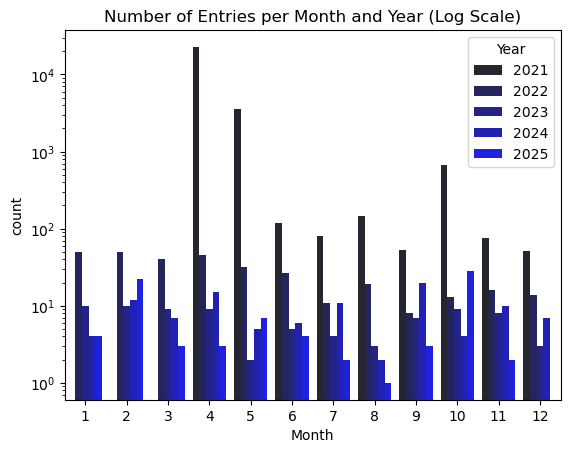

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='Month', hue='Year', color='blue')
plt.yscale('log')
plt.title('Number of Entries per Month and Year (Log Scale)')
plt.show()

__Normalized by Year Porpotions__

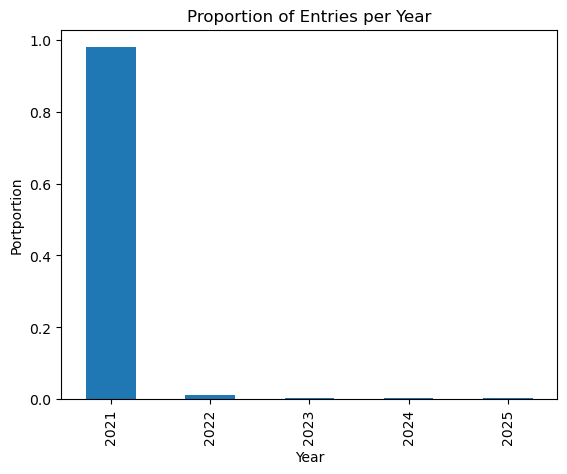

In [43]:
year_counts=df['Year'].value_counts(normalize=True).sort_index()
year_counts.plot(kind='bar')
plt.ylabel('Portportion')
plt.title('Proportion of Entries per Year')
plt.show()

__Normalized per Month Porportion__

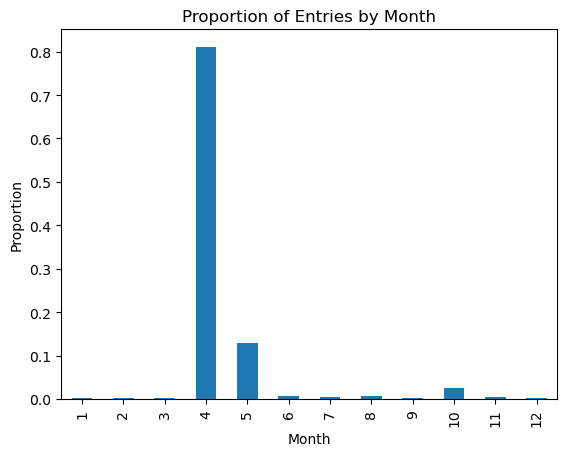

In [44]:
month_counts=df['Month'].value_counts(normalize=True).sort_index()
month_counts.plot(kind='bar')
plt.ylabel('Proportion')
plt.title('Proportion of Entries by Month')
plt.show()

__Count per Weekday__

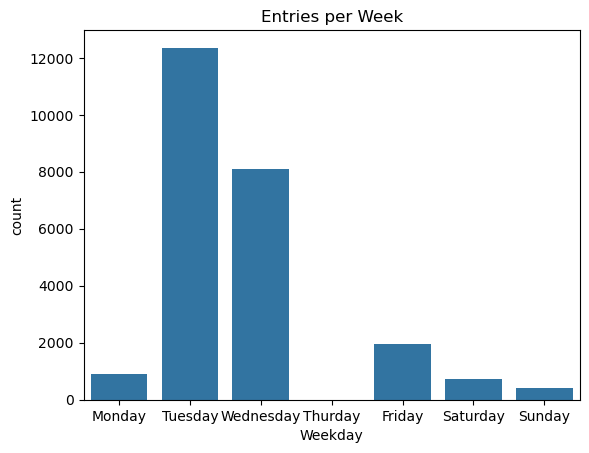

In [45]:
# Count per weekday
sns.countplot(data=df, x='Weekday', order=['Monday', 'Tuesday', 'Wednesday', 'Thurday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Entries per Week')
plt.show()

__Normalized Counts per Weekday__

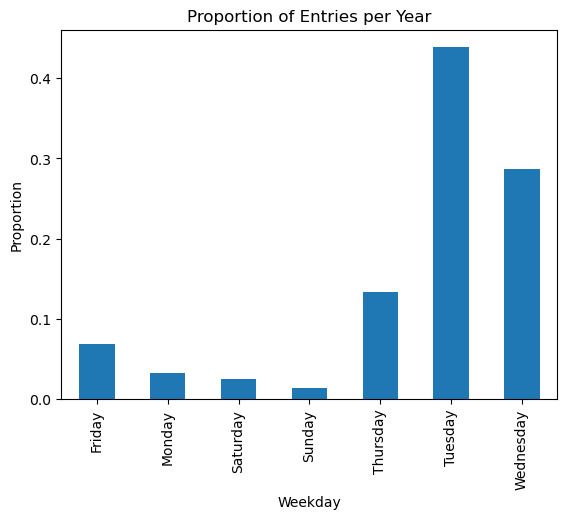

In [46]:
weekday_counts=df['Weekday'].value_counts(normalize=True).sort_index()
weekday_counts.plot(kind='bar')
plt.ylabel('Proportion')
plt.title('Proportion of Entries per Year')
plt.show()

__Time of the Day__

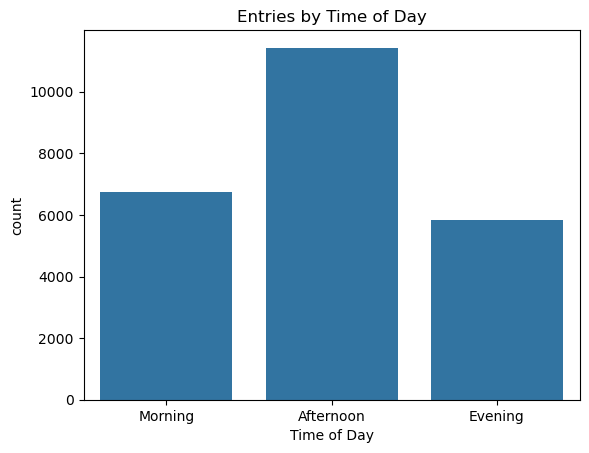

In [47]:
# Time of the Day
sns.countplot(data=df, x='Time of Day', order=['Morning','Afternoon','Evening'])
plt.title('Entries by Time of Day')
plt.show()

### Age Range

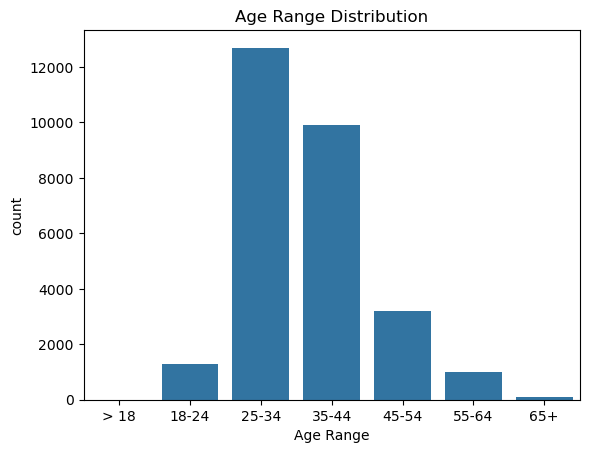

In [48]:
sns.countplot(data=df, x='Age Range', order=['> 18','18-24','25-34','35-44','45-54','55-64','65+'])
plt.title('Age Range Distribution')
plt.show()

__Normalized Age Range Distribution__

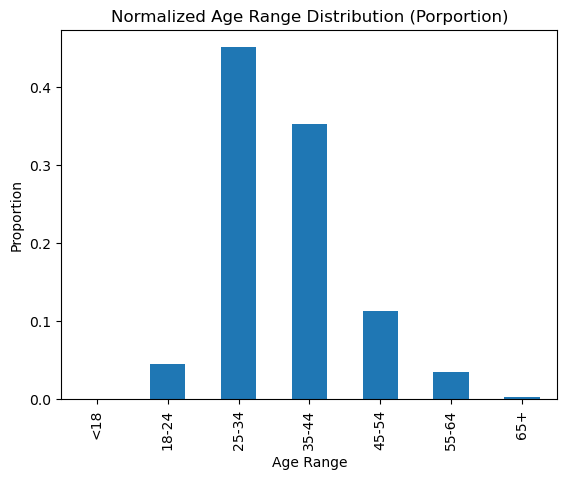

In [49]:
age_range_counts=df['Age Range'].value_counts(normalize=True).sort_index()
age_range_counts.plot(kind='bar')
plt.ylabel('Proportion')
plt.title('Normalized Age Range Distribution (Porportion)')
plt.show()

### Job Industry and Job Title

__Top Industries__

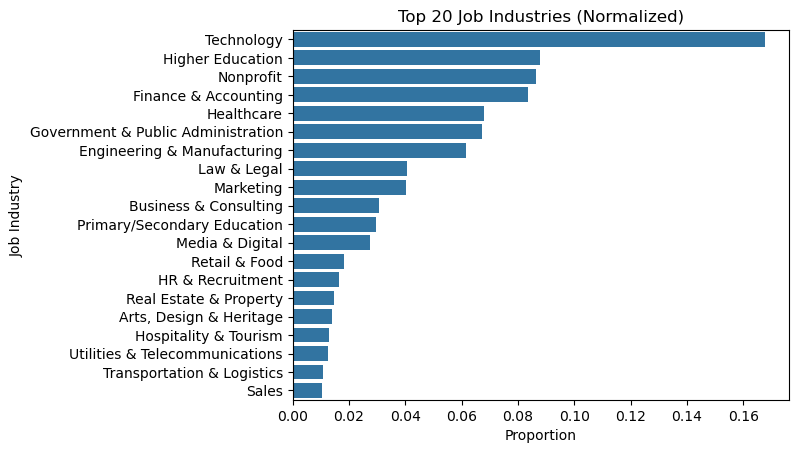

In [50]:
top_industries=df['Job Industry'].value_counts(normalize=True).head(20)
sns.barplot(y=top_industries.index, x=top_industries.values)
plt.title('Top 20 Job Industries (Normalized)')
plt.xlabel('Proportion')
plt.show()

__Top Job Titles__

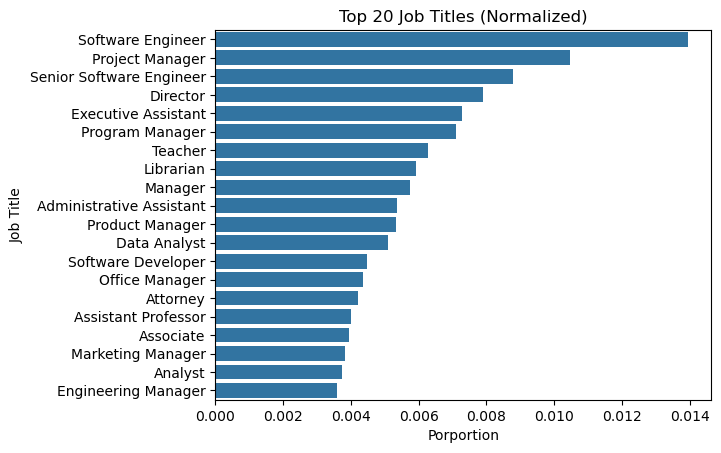

In [52]:
top_titles=df['Job Title'].value_counts(normalize=True).head(20)
sns.barplot(y=top_titles.index, x=top_titles.values)
plt.title('Top 20 Job Titles (Normalized)')
plt.xlabel('Porportion')
plt.show()

### Annual Salary & Bonus

__Annual Salary Distribution__

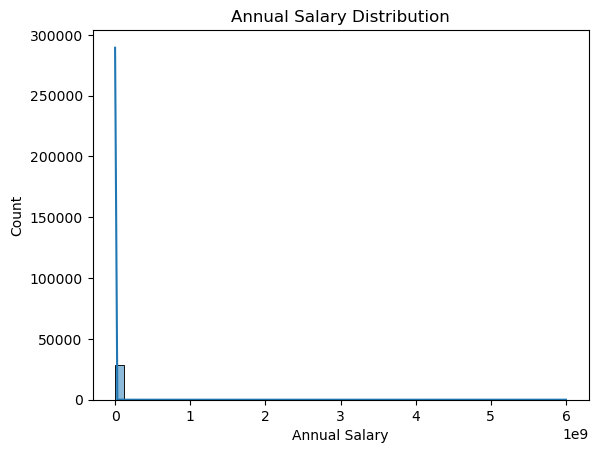

In [55]:
sns.histplot(df['Annual Salary'], bins=50, kde=True)
plt.title('Annual Salary Distribution')
plt.show()

__Bonus Compensation Distibution__

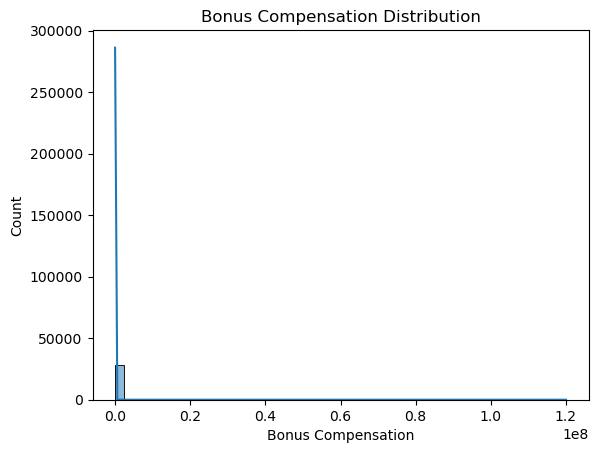

In [56]:
sns.histplot(df['Bonus Compensation'], bins=50, kde=True)
plt.title('Bonus Compensation Distribution')
plt.show()

### Age Range & Job Industry

__Salary by Age Range__

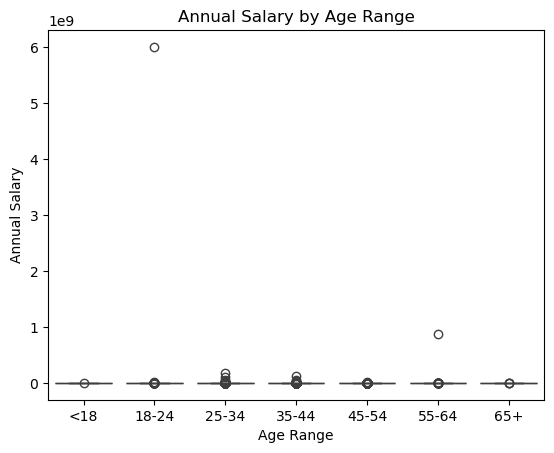

In [58]:
sns.boxplot(data=df, x='Age Range', y='Annual Salary')
plt.title('Annual Salary by Age Range')
plt.show()

__Salary by Job Industry__

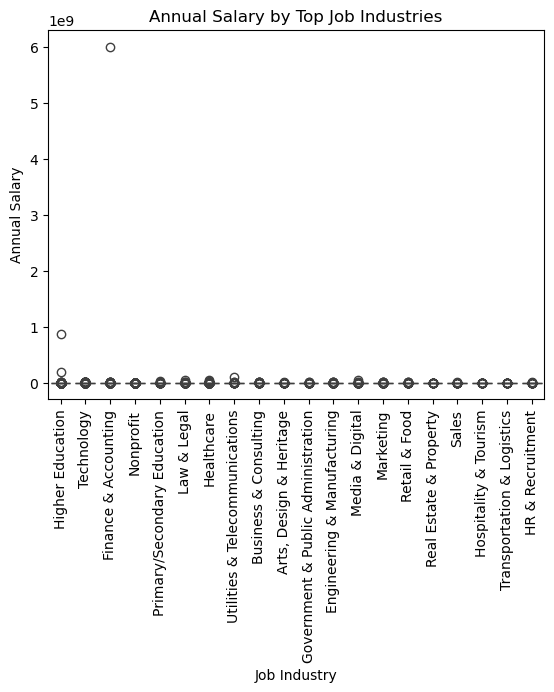

In [60]:
sns.boxplot(data=df[df['Job Industry'].isin(top_industries.index)], x='Job Industry', y='Annual Salary')
plt.xticks(rotation=90)
plt.title('Annual Salary by Top Job Industries')
plt.show()

### Categorical Columns

__Gender & Education Level Distributions__

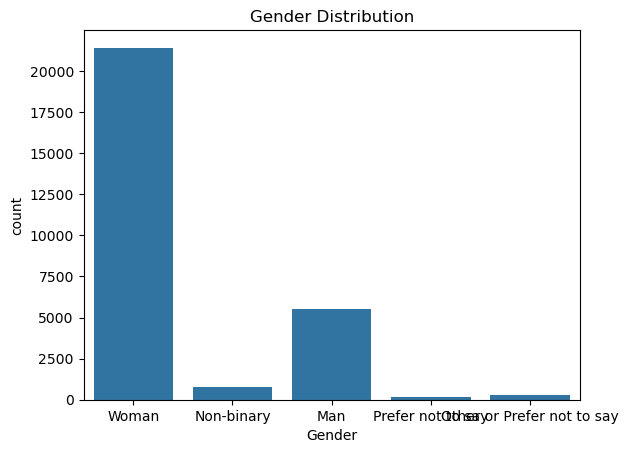

In [61]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

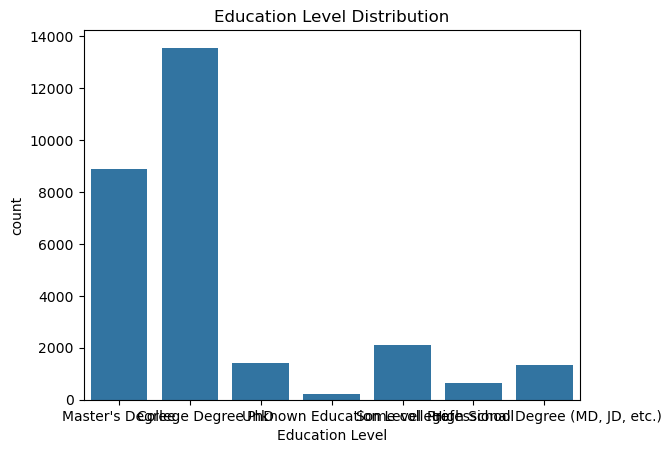

In [62]:
sns.countplot(data=df, x='Education Level')
plt.title('Education Level Distribution')
plt.show()

__Race Distribution__

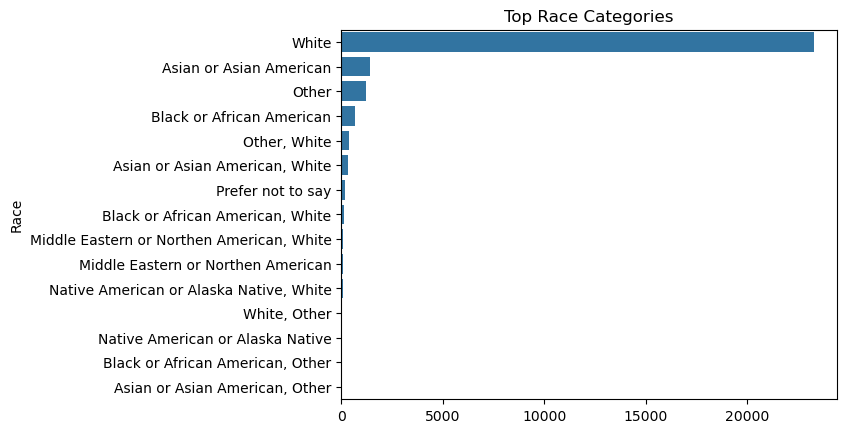

In [63]:
top_races=df['Race'].value_counts().head(15)
sns.barplot(y=top_races.index, x=top_races.values)
plt.title('Top Race Categories')
plt.show()

### Geographical Columns

__Country / US State__

* Top 20 Countries

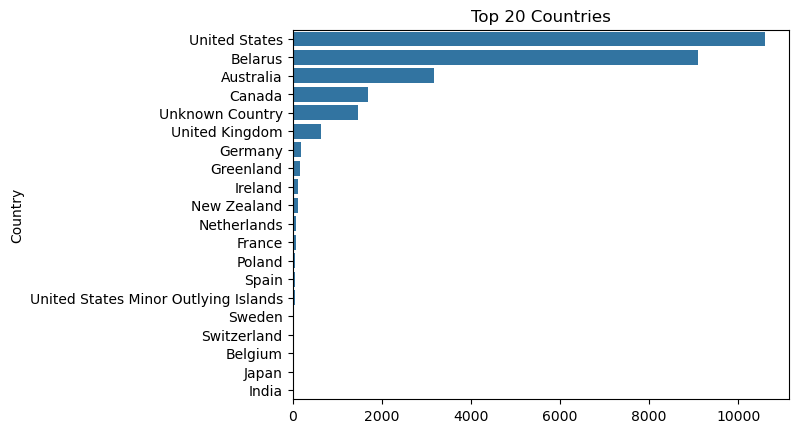

In [65]:
top_countries=df['Country'].value_counts().head(20)
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title('Top 20 Countries')
plt.show()

* Top 20 US States

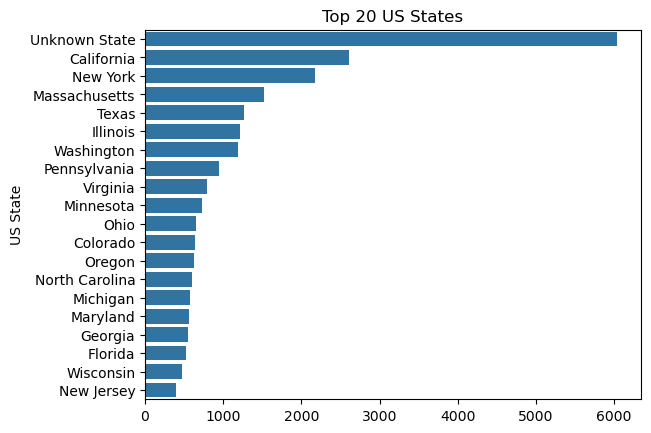

In [66]:
top_states=df['US State'].value_counts().head(20)
sns.barplot(y=top_states.index, x=top_states.values)
plt.title('Top 20 US States')
plt.show()

### Relationships/Correlations

* __Numeric Correlations__

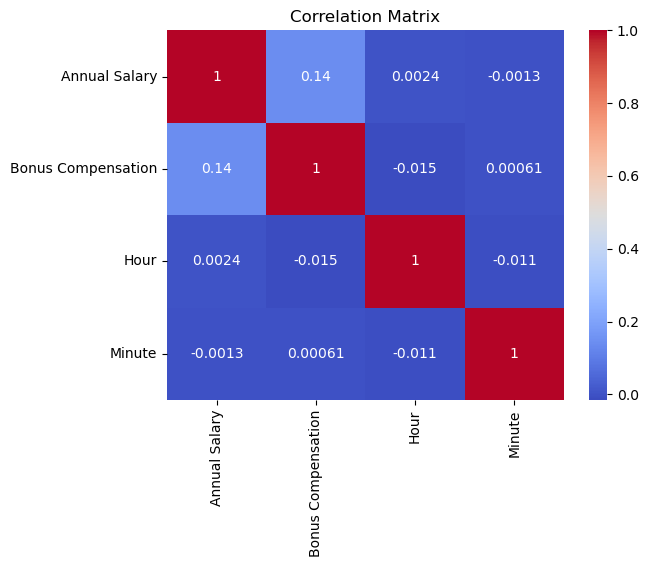

In [68]:
numeric_cols=['Annual Salary', 'Bonus Compensation', 'Hour', 'Minute']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()